In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [392]:
df = pd.read_excel("../materials/Studenciaki.xlsx")

# Overall info, removing unnasesery columns

In [393]:
print(df.columns)
print(df.shape)


Index(['Biopsja z >1 zmiany? (systematic grupa)', 'DATA URODZENIA', 'WIEK',
       'Prostatektomia w szpitalu?', 'PSA', 'PSAdensity', 'Prost vol, w MRI',
       'bx w szpitalu', 'DRE  0-prawidłowe 1-patologiczne',
       'bx (0 - biopsja pierwszy raz, 1 biopsja kolejna)',
       ...
       'Najwyższy ISUP z biopsji wszystkich', 'Wycinki + (REG)',
       'Wszystki Wycinki (REG)', 'ISUP bx SYS',
       'ilość dodatnich wycinków(SYSPL)2', 'ilość wycinków(SYSPL)',
       'ilość dodatnich wycinków(SYSPP)2', 'ilość  wycinków(SYSPP)',
       'Ilość dodatnich wycinków SYS', 'Ilość wszystkich wycinków SYS'],
      dtype='object', length=151)
(230, 151)


In [ ]:
df['combined_%_zajęcia_wycinków'] = df[['% zajęcia wycinków (CEL)', '%zajęcia wycinków(SYSPL)', '%zajęcia wycinków(SYSPP)', "% zajęcia wycinków (REG)"]].bfill(axis=1).iloc[:, 0]

/tmp/ipykernel_16069/4281419950.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['combined_%_wycinków'] = df[['% zajęcia wycinków (CEL)', '%zajęcia wycinków(SYSPL)', '%zajęcia wycinków(SYSPP)', "% zajęcia wycinków (REG)"]].bfill(axis=1).iloc[:, 0]


In [438]:
print(df["ilość wycinków dodatnich(CEL)"].dtype)
print(df["ilość wycinków dodatnich(CEL)"])
clean_CEL = df['ilość wycinków dodatnich(CEL)'].str.split("z", expand=True).str[0]/str[1].astype(float)*100
clean_SYSPL = df['ilość dodatnich wycinków(SYSPL)'].str.split("z", expand=True).str[0]/str[1].astype(float)*100
clean_SYSPP = df['ilość dodatnich wycinków(SYSPP)'].str.split("z", expand=True).str[0]/str[1].astype(float)*100
clean_REG = df["ilość wycinków dodatnich(REG)"].str.split("z", expand=True).str[0]/str[1].astype(float)*100


df['combined_ilość_dodatnich_wycinków'] = [clean_CEL, clean_SYSPL, clean_SYSPP, clean_REG].max(axis=1)

object
0      5z6
1      2z4
2      3z6
3      5z6
4      4z6
      ... 
225    NaN
226    NaN
227    NaN
228    NaN
229    NaN
Name: ilość wycinków dodatnich(CEL), Length: 230, dtype: object


AttributeError: 'DataFrame' object has no attribute 'str'

In [396]:
df = df.drop(columns=["DATA URODZENIA", ])

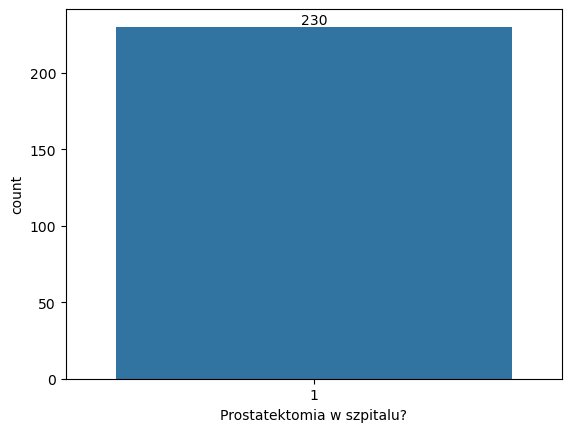

In [397]:
ax = sns.countplot(x="Prostatektomia w szpitalu?", data=df)
ax.bar_label(ax.containers[0])
plt.show()

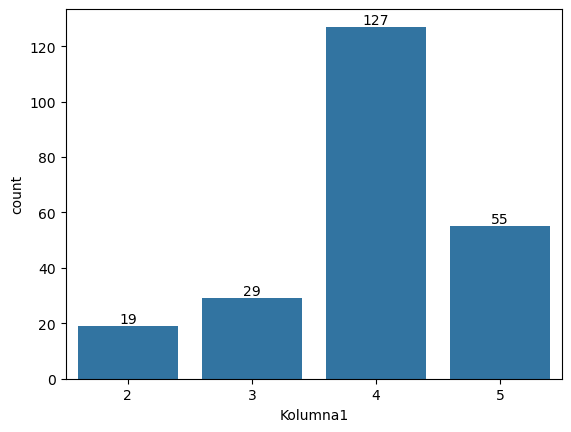

In [398]:
ax = sns.countplot(x="Kolumna1", data=df)
ax.bar_label(ax.containers[0])
plt.show()

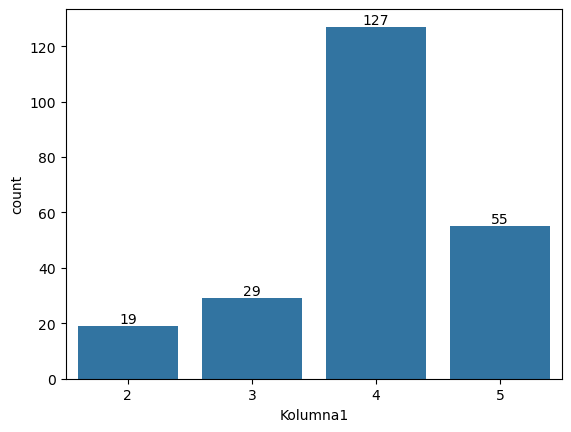

In [399]:
ax = sns.countplot(x="Kolumna1", data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [400]:
print(df.dtypes)


Biopsja z >1 zmiany? (systematic grupa)    float64
WIEK                                        object
Prostatektomia w szpitalu?                   int64
PSA                                        float64
PSAdensity                                 float64
                                            ...   
ilość  wycinków(SYSPP)                     float64
Ilość dodatnich wycinków SYS               float64
Ilość wszystkich wycinków SYS              float64
combined_%_wycinków                         object
combined_ilość_wycinków                     object
Length: 152, dtype: object


reomve Prostektomia w szpitalu couse usuless :/

In [401]:
df.drop(columns=["Prostatektomia w szpitalu?"], inplace=True)

In [402]:
df["ilość wycinków dodatnich(CEL)"].isnull().sum()

65

In [403]:
non_null_counts = df.notnull().sum()

threshold = 230-65

columns_with_many_missing = non_null_counts[non_null_counts < threshold]
print(len(columns_with_many_missing))
print(columns_with_many_missing)
df.shape

116
Biopsja z >1 zmiany? (systematic grupa)               0
bx (0 - biopsja pierwszy raz, 1 biopsja kolejna)     30
Strona EPE P/ L/ P+L                                  2
V zmiany 2                                           48
V zmiany 3                                           19
                                                   ... 
ilość wycinków(SYSPL)                                66
ilość dodatnich wycinków(SYSPP)2                     71
ilość  wycinków(SYSPP)                               68
Ilość dodatnich wycinków SYS                         88
Ilość wszystkich wycinków SYS                       107
Length: 116, dtype: int64


(230, 151)

In [404]:
df.drop(columns = columns_with_many_missing.index, inplace=True)


In [405]:
print(df.columns)
print(df.columns.shape)

Index(['WIEK', 'PSA', 'PSAdensity', 'Prost vol, w MRI', 'bx w szpitalu',
       'DRE  0-prawidłowe 1-patologiczne', 'EPE w MRI 0 nie 1 tak',
       'T na podstawie czy EPE+/-', 'V (objętość) zmiany Index Lesion',
       'V wszystkich zmian', 'Kolumna1', 'Liczba zmian',
       'PIRADS score - zmiana dominująca (IL)',
       'strefa obwodowa  (IL)  0-nie 1-tak ',
       'Strona w MRI płat P/L zmiana dominująca (IL)',
       'ISUP - biopsja celowana (CEL)', '% zajęcia wycinków (CEL)',
       'ilość wycinków dodatnich(CEL)', 'Najwyzszy isup',
       'ISUP - RADYKALNA PROSTATEKTOMIA', 'pT-stage',
       'R(margines) 0-ujemny 1 dodatni', 'EPE 0-nie 1 -tak', 'Bx CEL PC',
       'BxCEL csPCa', ' CEL isPC', 'TGSB 0, TGPL 1, TG 2, SB 3, ??? 4',
       'PIRADS score - zmiana dominująca (IL)3', 'TOTAL CORES',
       'Najwyższy ISUP z REG/SYS', 'Bx Cel<BxSYS/REG',
       'Najwyższy ISUP z biopsji wszystkich', 'ISUP bx SYS',
       'combined_%_wycinków', 'combined_ilość_wycinków'],
      dtype='obje

Remove ISUP - biopsja celowana (CEL) since we care more about max isup


In [406]:
df.drop(columns = ["ISUP - biopsja celowana (CEL)"])

,WIEK,PSA,PSAdensity,"Prost vol, w MRI",bx w szpitalu,DRE 0-prawidłowe 1-patologiczne,EPE w MRI 0 nie 1 tak,T na podstawie czy EPE+/-,V (objętość) zmiany Index Lesion,V wszystkich zmian,...,CEL isPC,"TGSB 0, TGPL 1, TG 2, SB 3, ??? 4",PIRADS score - zmiana dominująca (IL)3,TOTAL CORES,Najwyższy ISUP z REG/SYS,Bx Cel<BxSYS/REG,Najwyższy ISUP z biopsji wszystkich,ISUP bx SYS,combined_%_wycinków,combined_ilość_wycinków
0,67,6.40,0.213333,30.00,1,0.0,0,iT2,0.55,0.55,...,1.0,0,4.0,18,1,0,1,1,0.8,5z6
1,56,3.50,0.102941,34.00,1,0.0,0,iT2,0.52,0.52,...,1.0,0,4.0,16,1,0,1,1,0.34,2z4
2,76,8.82,0.122500,72.00,1,1.0,0,iT2,0.78,0.78,...,0.0,0,4.0,14,1,0,2,1,0.52,3z6
3,56,5.50,0.152778,36.00,1,1.0,0,iT2,0.34,0.34,...,0.0,0,4.0,14,3,1,3,3,40.0,5z6
4,68,10.80,0.225000,48.00,1,0.0,1,iT3,5.84,5.84,...,0.0,0,5.0,18,0,0,2,0,0.62,4z6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,71,6.20,0.238462,26.00,0,1.0,0,iT2,NaN,0.00,...,0.0,4,3.0,0,0,0,3,0,0.65,NaN
226,56,5.30,0.160606,33.00,0,0.0,0,iT2,NaN,0.00,...,0.0,4,4.0,0,0,0,3,0,0.6,NaN
227,74,7.50,0.162443,46.17,0,1.0,0,iT2,NaN,0.00,...,0.0,4,4.0,0,0,0,5,0,0.7,NaN
228,68,5.60,0.073684,76.00,0,0.0,0,iT2,NaN,0.00,...,1.0,4,4.0,0,0,0,1,0,0.25,NaN


In [407]:
# #CZYM JEST KOLUMNA1????
# df["Kolumna1"]
# ax = sns.countplot(x = "Kolumna1", data=df)
# ax.bar_label(ax.containers[0])
# plt.show()

# Check for null values

In [408]:
df.isnull().sum()

WIEK                                             0
PSA                                              0
PSAdensity                                       1
Prost vol, w MRI                                 1
bx w szpitalu                                    0
DRE  0-prawidłowe 1-patologiczne                 2
EPE w MRI 0 nie 1 tak                            0
T na podstawie czy EPE+/-                        0
V (objętość) zmiany Index Lesion                55
V wszystkich zmian                               0
Kolumna1                                         0
Liczba zmian                                     0
PIRADS score - zmiana dominująca (IL)            5
strefa obwodowa  (IL)  0-nie 1-tak              55
Strona w MRI płat P/L zmiana dominująca (IL)    36
ISUP - biopsja celowana (CEL)                    5
% zajęcia wycinków (CEL)                        30
ilość wycinków dodatnich(CEL)                   65
Najwyzszy isup                                   0
ISUP - RADYKALNA PROSTATEKTOMIA

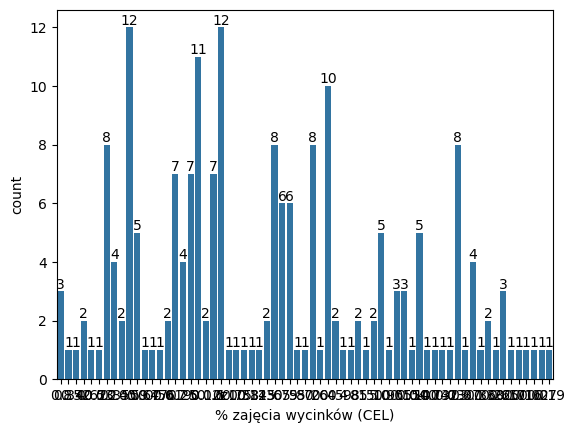

In [409]:
ax = sns.countplot(x="% zajęcia wycinków (CEL)", data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [410]:
df[df["PIRADS score - zmiana dominująca (IL)"].isnull()]

,WIEK,PSA,PSAdensity,"Prost vol, w MRI",bx w szpitalu,DRE 0-prawidłowe 1-patologiczne,EPE w MRI 0 nie 1 tak,T na podstawie czy EPE+/-,V (objętość) zmiany Index Lesion,V wszystkich zmian,...,CEL isPC,"TGSB 0, TGPL 1, TG 2, SB 3, ??? 4",PIRADS score - zmiana dominująca (IL)3,TOTAL CORES,Najwyższy ISUP z REG/SYS,Bx Cel<BxSYS/REG,Najwyższy ISUP z biopsji wszystkich,ISUP bx SYS,combined_%_wycinków,combined_ilość_wycinków
171,63,5.90,0.236000,25.0,0,1.0,1,iT3,NaN,0.00,...,0.0,4,NaN,0,0,0,3,0,1.0,NaN
179,63,11.00,0.333333,33.0,0,1.0,0,iT2,1.05,1.05,...,0.0,4,NaN,0,0,0,3,0,NaN,NaN
209,64,1.05,0.028378,37.0,0,0.0,0,iT2,2.48,3.42,...,0.0,4,NaN,0,0,0,2,0,NaN,NaN
220,73,8.00,0.172786,46.3,0,0.0,0,iT2,0.86,1.17,...,0.0,4,NaN,0,0,0,3,0,0.1,NaN
222,70,9.70,0.485000,20.0,0,0.0,0,iT2,0.72,1.13,...,1.0,4,NaN,0,0,0,1,0,0.3,NaN


In [411]:
#print(df["% zajęcia wycinków (CEL)"])
is_true = df["% zajęcia wycinków (CEL)"] == "0z10"
#print(df[is_true])
df.loc[30, "% zajęcia wycinków (CEL)"] = "0.0"
df["% zajęcia wycinków (CEL)"] = df["% zajęcia wycinków (CEL)"].astype(float)
max = df["% zajęcia wycinków (CEL)"].max()
print(f"max: {max}")
min = df["% zajęcia wycinków (CEL)"].min()
print(f"min: {min}")
mask = df["% zajęcia wycinków (CEL)"].isnull()
mask.sum()
df.loc[mask, "% zajęcia wycinków (CEL)"] = np.random.randint(int(min), int(max)+1, size=mask.sum())
print(df["% zajęcia wycinków (CEL)"].isnull().sum())

max: 100.0
min: 0.0
0


In [412]:
# df.isnull().sum()
# k = df["PSAdensity"].isnull()
# df.loc[k, "PSAdensity"] = df["PSAdensity"].mean()
# print(df["PSAdensity"].isnull().sum())

In [413]:
mask = df.isnull().sum() > 0
print(df.columns[mask])
numeric_columns = df.select_dtypes(include=['number']) 
print(numeric_columns.columns)
numerical_and_mask = numeric_columns.columns.intersection(df.columns[mask])
print(numerical_and_mask)


Index(['PSAdensity', 'Prost vol, w MRI', 'DRE  0-prawidłowe 1-patologiczne',
       'V (objętość) zmiany Index Lesion',
       'PIRADS score - zmiana dominująca (IL)',
       'strefa obwodowa  (IL)  0-nie 1-tak ',
       'Strona w MRI płat P/L zmiana dominująca (IL)',
       'ISUP - biopsja celowana (CEL)', 'ilość wycinków dodatnich(CEL)',
       'Bx CEL PC', 'BxCEL csPCa', ' CEL isPC',
       'PIRADS score - zmiana dominująca (IL)3', 'combined_%_wycinków',
       'combined_ilość_wycinków'],
      dtype='object')
Index(['PSA', 'PSAdensity', 'Prost vol, w MRI', 'bx w szpitalu',
       'DRE  0-prawidłowe 1-patologiczne', 'EPE w MRI 0 nie 1 tak',
       'V (objętość) zmiany Index Lesion', 'V wszystkich zmian', 'Kolumna1',
       'Liczba zmian', 'PIRADS score - zmiana dominująca (IL)',
       'strefa obwodowa  (IL)  0-nie 1-tak ', 'ISUP - biopsja celowana (CEL)',
       '% zajęcia wycinków (CEL)', 'Najwyzszy isup',
       'ISUP - RADYKALNA PROSTATEKTOMIA', 'R(margines) 0-ujemny 1 dodatni',

In [414]:
df.fillna(df[numerical_and_mask].mean(), inplace=True)
df.isnull().sum()

WIEK                                             0
PSA                                              0
PSAdensity                                       0
Prost vol, w MRI                                 0
bx w szpitalu                                    0
DRE  0-prawidłowe 1-patologiczne                 0
EPE w MRI 0 nie 1 tak                            0
T na podstawie czy EPE+/-                        0
V (objętość) zmiany Index Lesion                 0
V wszystkich zmian                               0
Kolumna1                                         0
Liczba zmian                                     0
PIRADS score - zmiana dominująca (IL)            0
strefa obwodowa  (IL)  0-nie 1-tak               0
Strona w MRI płat P/L zmiana dominująca (IL)    36
ISUP - biopsja celowana (CEL)                    0
% zajęcia wycinków (CEL)                         0
ilość wycinków dodatnich(CEL)                   65
Najwyzszy isup                                   0
ISUP - RADYKALNA PROSTATEKTOMIA

    WIEK   PSA  PSAdensity  Prost vol, w MRI  bx w szpitalu  \
132  tak  16.0    0.347826              46.0              1   

     DRE  0-prawidłowe 1-patologiczne  EPE w MRI 0 nie 1 tak  \
132                               1.0                      0   

    T na podstawie czy EPE+/-  V (objętość) zmiany Index Lesion  \
132                       iT2                              4.63   

     V wszystkich zmian  ...   CEL isPC  TGSB 0, TGPL 1, TG 2, SB 3, ??? 4  \
132                4.78  ...        1.0                                  2   

     PIRADS score - zmiana dominująca (IL)3  TOTAL CORES  \
132                                     5.0            0   

    Najwyższy ISUP z REG/SYS  Bx Cel<BxSYS/REG  \
132                        0                 0   

     Najwyższy ISUP z biopsji wszystkich ISUP bx SYS  combined_%_wycinków  \
132                                    1           0                 90.0   

     combined_ilość_wycinków  
132                    12z12  

[1 rows x 35

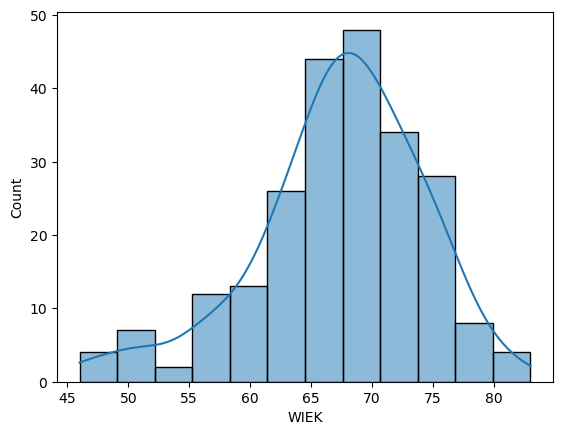

In [415]:
wiek_10 = df["WIEK"] == "tak"
print(df[wiek_10])
print(df.at[132, "WIEK"])
df.loc[132, "WIEK"] = 65
ax = sns.histplot(df["WIEK"], bins=12, kde=True)
df["WIEK"] = df["WIEK"].astype(int)


# Wywalenie tych które zostały by jedyny atrybót z Nan'ami był ilość wycinkóœ dodatnich(CEL)

In [416]:
mask = df.isnull().sum()
df[mask[mask > 0].index]


,Strona w MRI płat P/L zmiana dominująca (IL),ilość wycinków dodatnich(CEL),combined_%_wycinków,combined_ilość_wycinków
0,L,5z6,0.8,5z6
1,L,2z4,0.34,2z4
2,P,3z6,0.52,3z6
3,L,5z6,40.0,5z6
4,P,4z6,0.62,4z6
...,...,...,...,...
225,NaN,NaN,0.65,NaN
226,NaN,NaN,0.6,NaN
227,NaN,NaN,0.7,NaN
228,NaN,NaN,0.25,NaN


In [417]:
df.drop(columns=["Strona w MRI płat P/L zmiana dominująca (IL)"], inplace=True)

# Check outliers

In [418]:
# def count_outliers(df, numerical_cols):
#     print(f"Number of outliers in:")
#     for column in numerical_cols:
#         q1 = df[column].quantile(0.25)
#         q3 = df[column].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - 1.5 * iqr
#         upper_bound = q3 + 1.5 * iqr
#         count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
#         print(f"  - {column}: {count} ({count/len(df)*100:.2f}%)")

# numerical_cols = [df.columns[i] for i in range(len(df.columns)) if df.dtypes[i] in ['float64']]
# count_outliers(df, numerical_cols)

# def remove_outliers_iqr(df):
#     numerical_cols = df.select_dtypes(include=['float64']).columns
#     # Calculate IQR for each column
#     Q1 = df[numerical_cols].quantile(0.25)
#     Q3 = df[numerical_cols].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Create a mask for valid rows (rows NOT outliers)
#     # This keeps rows where ALL numerical values are within bounds.
#     # If you want to be less strict (e.g. only remove if outlier in key columns), adjust here.
#     mask = ~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)
    
#     df_clean = df[mask]
    
#     print(f"Original shape: {df.shape}")
#     print(f"Shape after removing outliers: {df_clean.shape}")
#     print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")
    
#     return df_clean
# df_cleaned = remove_outliers_iqr(df)


# Remove Duplicates

In [419]:
# :) 

print(df.duplicated().sum())

0


In [420]:
df.columns

Index(['WIEK', 'PSA', 'PSAdensity', 'Prost vol, w MRI', 'bx w szpitalu',
       'DRE  0-prawidłowe 1-patologiczne', 'EPE w MRI 0 nie 1 tak',
       'T na podstawie czy EPE+/-', 'V (objętość) zmiany Index Lesion',
       'V wszystkich zmian', 'Kolumna1', 'Liczba zmian',
       'PIRADS score - zmiana dominująca (IL)',
       'strefa obwodowa  (IL)  0-nie 1-tak ', 'ISUP - biopsja celowana (CEL)',
       '% zajęcia wycinków (CEL)', 'ilość wycinków dodatnich(CEL)',
       'Najwyzszy isup', 'ISUP - RADYKALNA PROSTATEKTOMIA', 'pT-stage',
       'R(margines) 0-ujemny 1 dodatni', 'EPE 0-nie 1 -tak', 'Bx CEL PC',
       'BxCEL csPCa', ' CEL isPC', 'TGSB 0, TGPL 1, TG 2, SB 3, ??? 4',
       'PIRADS score - zmiana dominująca (IL)3', 'TOTAL CORES',
       'Najwyższy ISUP z REG/SYS', 'Bx Cel<BxSYS/REG',
       'Najwyższy ISUP z biopsji wszystkich', 'ISUP bx SYS',
       'combined_%_wycinków', 'combined_ilość_wycinków'],
      dtype='object')

# RENAME


In [421]:
new_names = {
    "WIEK": "",
    "Prost vol w MRI": "",
    "BX": "",
    "DRE 0-prawidłowe 1-patologiczne" : "DRE",
    "EPE w MRI 0 nie 1 tak" : "MRI EPE",
    "T na podstawie czy EPE+/-" : "T EPE", # tez nie wiem co to 
    "V wszystkich zmian" : "V", #tu nie wiem co to (objętość?)
    "Kolumna1": "",
    "PIRADS score - zmiana dominująca (IL)": "",
    "Najwyzszy isup" : "Bx Isup Grade",
    "RP ISUP Grade": "",
    "pT-stage": "",
    
    
    
    "ISUP - biopsja celowana (CEL)": "",
    "% zajęcia wycinków (CEL)": "",
    "ISUP - RADYKALNA PROSTATEKTOMIA" : "RP ISUP Grade",

    
    
    "Najwyższy ISUP z biopsji" : "Bx ISUP Grade",
    
}

# SAVE DATASET

In [422]:
df.to_csv('.././materials/processed_df_studenciaki.csv', index=False)